In [1]:
import pandas as pd
import lightgbm as lgb
import matplotlib as plt
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [2]:
data = pd.read_csv('creditcard.csv')
data.head()
data.shape

(284807, 31)

In [3]:
data['Class'].value_counts()


0    284315
1       492
Name: Class, dtype: int64

In [4]:
data['Class'].value_counts(normalize=True)


0    0.998273
1    0.001727
Name: Class, dtype: float64

In [5]:
X =  data.drop('Class', axis=1)
y =  data['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
# Naive Model
naive_model = lgb.LGBMClassifier()
naive_model.fit(X_train, y_train, eval_set=[(X_train, y_train), (X_test, y_test)],
                verbose=20,
                eval_metric='logloss')

[20]	training's binary_logloss: 0.022152	valid_1's binary_logloss: 0.0363543
[40]	training's binary_logloss: 0.0309386	valid_1's binary_logloss: 0.0577698
[60]	training's binary_logloss: 0.0516572	valid_1's binary_logloss: 0.0814087
[80]	training's binary_logloss: 0.0601624	valid_1's binary_logloss: 0.0721815
[100]	training's binary_logloss: 0.060879	valid_1's binary_logloss: 0.0842406


LGBMClassifier()

In [9]:
y_train_pred = naive_model.predict(X_train)

In [10]:
y_train_pred

array([0, 0, 0, ..., 0, 0, 0])

In [11]:
naive_model.score(X_train, y_train)

0.9981478636792557

In [12]:
naive_model.score(X_test, y_test)


0.9973666654962958

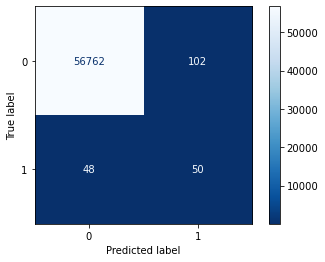

In [13]:
metrics.plot_confusion_matrix(naive_model,
                              X_test, y_test, cmap='Blues_r')
